In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the datasets
matches = pd.read_csv("match_info_data.csv")
deliveries = pd.read_csv("match_data.csv")

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [5]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [6]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [8]:
# Check for missing values
print("Missing values in Matches dataset:")
print(matches.isnull().sum())

Missing values in Matches dataset:
id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64


In [9]:
# Handling missing values 
matches['city'].fillna("Unknown", inplace=True)

In [10]:
matches['winner'].fillna("No Result",inplace=True)

In [11]:
matches['player_of_match'].fillna("Unknown", inplace=True)

In [12]:
matches['umpire3'].fillna("Unknown", inplace=True)

In [13]:
print(matches.isnull().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [14]:
matches.shape

(1024, 18)

In [15]:
print(matches.describe())

                 id   dl_applied  win_by_runs  win_by_wickets
count  1.024000e+03  1024.000000  1024.000000     1024.000000
mean   8.687579e+05     0.020508    13.610352        3.286133
std    3.528920e+05     0.141799    23.443273        3.375659
min    3.359820e+05     0.000000     0.000000        0.000000
25%    5.483138e+05     0.000000     0.000000        0.000000
50%    8.298140e+05     0.000000     0.000000        3.000000
75%    1.216503e+06     0.000000    19.000000        6.000000
max    1.370353e+06     1.000000   146.000000       10.000000


In [16]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             1024 non-null   object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1024 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1024 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1024 non-null   

In [17]:
print(f"Duplicate rows:{matches.duplicated().sum()}")

Duplicate rows:0


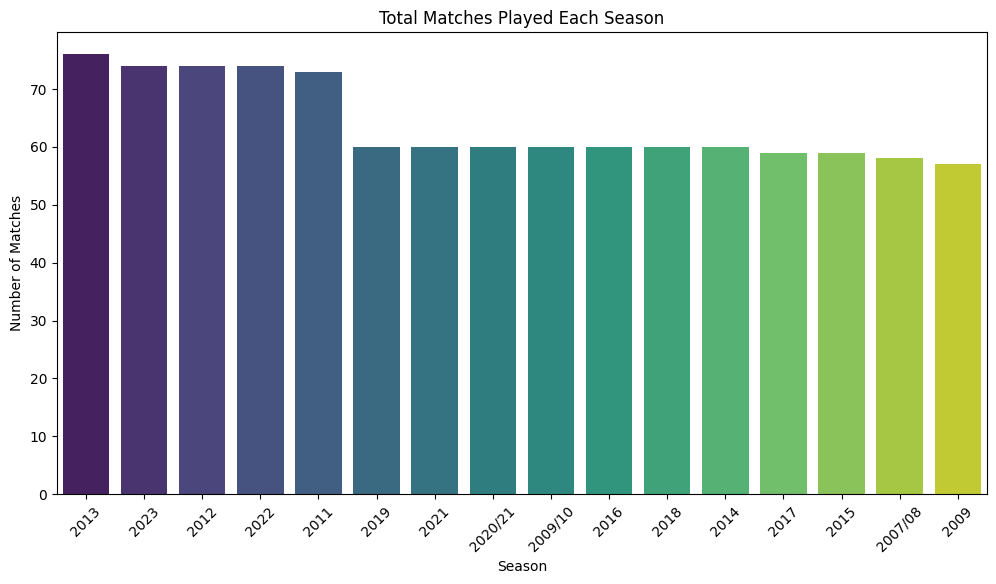

In [18]:
# total matches played each season 

plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches, palette='viridis', order=matches['season'].value_counts().index)
plt.title('Total Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

Insights for "Total Matches Played Each Season"

1. Overview:

   This bar chart represents the total number of matches played in each IPL season from 2008 to 2023.

2. Key Observations:

   The highest number of matches were played in 2013 and 2023, with over 70 matches.
   There is a noticeable dip in matches played in 2020 due to the impact of COVID-19.
   Earlier seasons (2008–2010) had fewer matches compared to recent years.
   The number of matches fluctuates based on league format changes, the addition of new teams, and external factors.

3. Possible Explanations:

   The IPL expanded over the years, adding new teams and changing the tournament format.
   The COVID-19 pandemic (2020) led to a reduction in matches.
   Some years saw an increase in teams, leading to more matches per season.

4. Business/Cricketing Insights:

   The number of matches directly affects revenue, viewership, and sponsorship deals.
   Years with more matches could indicate a change in league format, such as adding playoff stages or new teams.
   Analyzing trends in match counts can help predict future IPL scheduling and potential expansion.

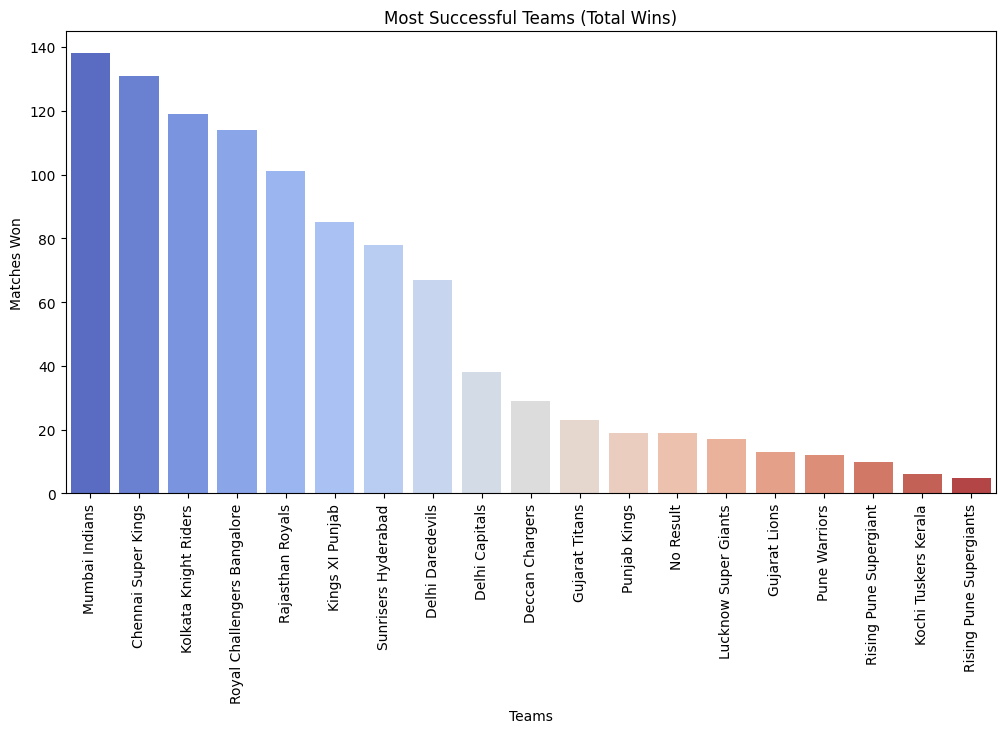

In [19]:
# Most sucessful teams(Matches won)

plt.figure(figsize=(12,6))
sns.barplot(x=matches['winner'].value_counts().index, y=matches['winner'].value_counts(), palette='coolwarm')
plt.title('Most Successful Teams (Total Wins)')
plt.xlabel('Teams')
plt.ylabel('Matches Won')
plt.xticks(rotation=90)
plt.show()

Most Successful Teams (Total Wins) - Insights

Mumbai Indians (MI) – The most successful IPL team with the highest number of wins.

Chennai Super Kings (CSK) – Consistently dominant, with one of the highest win counts.

Kolkata Knight Riders (KKR) – A strong performer with multiple IPL titles.

Royal Challengers Bangalore (RCB) – Despite having star players, they lack consistency.

Rajasthan Royals (RR) – Strong in early seasons but less dominant in recent years.

Punjab Kings (PBKS) – A mid-tier performer with fluctuating success.

Sunrisers Hyderabad (SRH) – A competitive team with a fair number of wins.

Delhi Capitals (DC) – Improved in recent seasons but historically inconsistent.

Gujarat Titans (GT) & Lucknow Super Giants (LSG) – Newer teams showing early promise.

Defunct teams like Deccan Chargers, Gujarat Lions, and Rising Pune Supergiant had short but impactful stints.

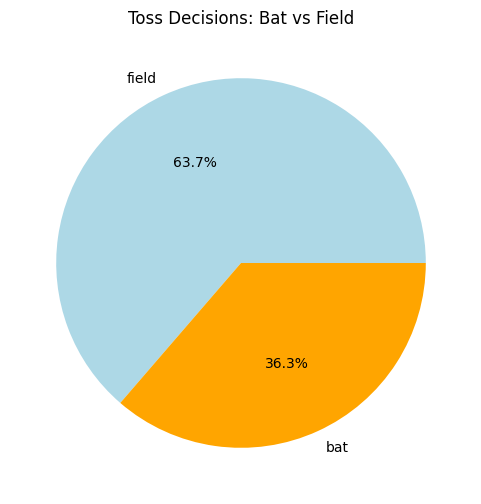

In [20]:
# Toss decision trends (bat vs field)

plt.figure(figsize=(6,6))
matches['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Toss Decisions: Bat vs Field')
plt.ylabel('')
plt.show()

Insights on Toss Decision

63.7% of teams chose to field first after winning the toss, indicating a preference for chasing the target rather than setting one.

36.3% of teams opted to bat first, possibly in situations where batting-friendly pitches or scoreboard pressure were factors.

The preference for fielding suggests teams trust their chasing abilities and expect pitch conditions to improve over time.

In [21]:
# second data set 
deliveries

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982


In [22]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [23]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [24]:
deliveries.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236165
noballs                   242799
byes                      243189
legbyes                   240039
penalty                   243815
wicket_type               231750
player_dismissed          231750
other_wicket_type         243817
other_player_dismissed    243817
cricsheet_id                   0
dtype: int64

In [25]:
# Fill missing extras with 0
deliveries.fillna({'wides': 0, 'noballs': 0, 'byes': 0, 'legbyes': 0, 'penalty': 0}, inplace=True)

# Fill missing wicket details with "Not Out" or "None"
deliveries['wicket_type'].fillna("Not Out", inplace=True)
deliveries['player_dismissed'].fillna("None", inplace=True)

# Drop columns with 100% missing values
deliveries.drop(columns=['other_wicket_type', 'other_player_dismissed'], inplace=True)

# Verify
print(deliveries.isnull().sum())

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
cricsheet_id        0
dtype: int64


In [26]:
# Rename 'id' column in matches to 'match_id'
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [27]:
# Merge datasets
merged_df = deliveries.merge(matches, on='match_id', how='inner')

In [28]:
# Check the merged dataset
print(merged_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          243817 non-null  int64  
 1   season_x          243817 non-null  object 
 2   start_date        243817 non-null  object 
 3   venue_x           243817 non-null  object 
 4   innings           243817 non-null  int64  
 5   ball              243817 non-null  float64
 6   batting_team      243817 non-null  object 
 7   bowling_team      243817 non-null  object 
 8   striker           243817 non-null  object 
 9   non_striker       243817 non-null  object 
 10  bowler            243817 non-null  object 
 11  runs_off_bat      243817 non-null  int64  
 12  extras            243817 non-null  int64  
 13  wides             243817 non-null  float64
 14  noballs           243817 non-null  float64
 15  byes              243817 non-null  float64
 16  legbyes           24

In [29]:

print(merged_df.head())



   match_id season_x  start_date                           venue_x  innings  \
0   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
1   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
2   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
3   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   
4   1370353     2023  2023-05-29  Narendra Modi Stadium, Ahmedabad        1   

   ball    batting_team         bowling_team       striker   non_striker  ...  \
0   0.1  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
1   0.2  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
2   0.3  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
3   0.4  Gujarat Titans  Chennai Super Kings  Shubman Gill       WP Saha  ...   
4   0.5  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   

  result  dl_applied               win

In [30]:
merged_df.columns

Index(['match_id', 'season_x', 'start_date', 'venue_x', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'cricsheet_id',
       'season_y', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue_y', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [31]:
merged_df = merged_df.drop(columns=['season_x', 'venue_x']).rename(columns={'season_y': 'season', 'venue_y': 'venue'})

merged_df = merged_df.drop(columns=['cricsheet_id'])

In [32]:
merged_df.isnull().sum()

match_id            0
start_date          0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [33]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [34]:
merged_df['match_id'].nunique(),merged_df.shape[0]

(1024, 243817)

In [35]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [36]:
# Feature Engenering
# Feature 1: Total Runs per Match

# Calculates the total runs scored in each match.

match_runs = merged_df.groupby('match_id')['runs_off_bat'].sum().reset_index()
match_runs.rename(columns={'runs_off_bat': 'total_runs'}, inplace=True)

In [37]:
#Feature 2: Total Wickets per Match

#Counts the number of dismissals in each match.

match_wickets = merged_df.groupby('match_id')['player_dismissed'].count().reset_index()
match_wickets.rename(columns={'player_dismissed': 'total_wickets'}, inplace=True)

In [38]:
#Feature 3: Extra Runs per Match

#Calculates the total extra runs (wides, no-balls, leg-byes, etc.) in each match.

match_extras = merged_df.groupby('match_id')['extras'].sum().reset_index()
match_extras.rename(columns={'extras': 'total_extras'}, inplace=True)

In [39]:
#Feature 4: Boundary Count (4s and 6s) Per Match

#Counts the number of fours and sixes scored in each match.

match_boundaries = merged_df.groupby('match_id')['runs_off_bat'].apply(lambda x: ((x == 4).sum(), (x == 6).sum())).reset_index()
match_boundaries[['total_fours', 'total_sixes']] = pd.DataFrame(match_boundaries['runs_off_bat'].tolist(), index=match_boundaries.index)
match_boundaries.drop(columns=['runs_off_bat'], inplace=True)

In [40]:
#Feature 5: Batting Team Total Runs Per Match

#Calculates the total runs scored by each team in each match.

team_runs = merged_df.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
team_runs.rename(columns={'runs_off_bat': 'team_total_runs'}, inplace=True)

In [41]:
#Feature 6: Bowling Team Wickets Taken Per Match

#Counts the number of wickets taken by each bowling team per match.

team_wickets = merged_df.groupby(['match_id', 'bowling_team'])['player_dismissed'].count().reset_index()
team_wickets.rename(columns={'player_dismissed': 'team_total_wickets'}, inplace=True)

In [42]:
#Feature 7: Toss Winner and Toss Decision

#Assigns whether the toss winner chose to bat or bowl.

toss_decision = merged_df[['match_id', 'toss_winner', 'toss_decision']].drop_duplicates()

In [43]:
#Feature 8: Winning Team and Margin

#Stores the match winner along with the winning margin (runs/wickets).

match_winner = merged_df[['match_id', 'winner', 'win_by_runs', 'win_by_wickets']].drop_duplicates()

In [44]:
#Feature 9: Player of the Match

# Extracts the Player of the Match for each match.

player_of_match = merged_df[['match_id', 'player_of_match']].drop_duplicates()

In [45]:
#Feature 10: Venue Information

#Stores the stadium where each match was played.

match_venues = merged_df[['match_id', 'venue']].drop_duplicates()

In [46]:
#Feature 11: Umpires in the Match

#Stores the umpires who officiated the match.

umpires = merged_df[['match_id', 'umpire1', 'umpire2', 'umpire3']].drop_duplicates()

In [47]:
#Final Merging of Features

#After creating individual feature DataFrames, merge them into a single dataset.

final_features = match_runs \
    .merge(match_wickets, on='match_id', how='left') \
    .merge(match_extras, on='match_id', how='left') \
    .merge(match_boundaries, on='match_id', how='left') \
    .merge(team_runs, on='match_id', how='left') \
    .merge(team_wickets, on='match_id', how='left') \
    .merge(toss_decision, on='match_id', how='left') \
    .merge(match_winner, on='match_id', how='left') \
    .merge(player_of_match, on='match_id', how='left') \
    .merge(match_venues, on='match_id', how='left') \
    .merge(umpires, on='match_id', how='left')

In [48]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [49]:
print(final_features.columns)

Index(['match_id', 'total_runs', 'total_wickets', 'total_extras',
       'total_fours', 'total_sixes', 'batting_team', 'team_total_runs',
       'bowling_team', 'team_total_wickets', 'toss_winner', 'toss_decision',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')


In [50]:
merged_df = merged_df.merge(final_features, on='match_id', how='left')

In [51]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'batting_team_x',
       'bowling_team_x', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner_x', 'toss_decision_x', 'result', 'dl_applied',
       'winner_x', 'win_by_runs_x', 'win_by_wickets_x', 'player_of_match_x',
       'venue_x', 'umpire1_x', 'umpire2_x', 'umpire3_x', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team_y', 'team_total_runs', 'bowling_team_y',
       'team_total_wickets', 'toss_winner_y', 'toss_decision_y', 'winner_y',
       'win_by_runs_y', 'win_by_wickets_y', 'player_of_match_y', 'venue_y',
       'umpire1_y', 'umpire2_y', 'umpire3_y'],
      dtype='object')

In [52]:
# Dropping duplicate columns
columns_to_drop = [col for col in merged_df.columns if col.endswith('_x')]
merged_df.drop(columns=columns_to_drop, inplace=True)

# Renaming the '_y' columns to remove the suffix
merged_df.rename(columns=lambda col: col.rstrip('_y') if col.endswith('_y') else col, inplace=True)

# Check final column names
print(merged_df.columns)

Index(['match_id', 'start_date', 'innings', 'ball', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'season',
       'city', 'date', 'team1', 'team2', 'result', 'dl_applied', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team', 'team_total_runs', 'bowling_team', 'team_total_wickets',
       'toss_winner', 'toss_decision', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [53]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'season',
       'city', 'date', 'team1', 'team2', 'result', 'dl_applied', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team', 'team_total_runs', 'bowling_team', 'team_total_wickets',
       'toss_winner', 'toss_decision', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974341 entries, 0 to 974340
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   match_id            974341 non-null  int64  
 1   start_date          974341 non-null  object 
 2   innings             974341 non-null  int64  
 3   ball                974341 non-null  float64
 4   striker             974341 non-null  object 
 5   non_striker         974341 non-null  object 
 6   bowler              974341 non-null  object 
 7   runs_off_bat        974341 non-null  int64  
 8   extras              974341 non-null  int64  
 9   wides               974341 non-null  float64
 10  noballs             974341 non-null  float64
 11  byes                974341 non-null  float64
 12  legbyes             974341 non-null  float64
 13  penalty             974341 non-null  float64
 14  wicket_type         974341 non-null  object 
 15  player_dismissed    974341 non-nul

In [55]:
merged_df.columns

Index(['match_id', 'start_date', 'innings', 'ball', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'season',
       'city', 'date', 'team1', 'team2', 'result', 'dl_applied', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team', 'team_total_runs', 'bowling_team', 'team_total_wickets',
       'toss_winner', 'toss_decision', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [56]:
columns_to_drop = ['umpire1', 'umpire2', 'umpire3', 'match_id', 'start_date', 'innings', 'ball', 'non_striker','date','extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'dl_applied']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [57]:
merged_df.columns

Index(['striker', 'bowler', 'runs_off_bat', 'wicket_type', 'player_dismissed',
       'season', 'city', 'team1', 'team2', 'result', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team', 'team_total_runs', 'bowling_team', 'team_total_wickets',
       'toss_winner', 'toss_decision', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [58]:
merged_df.isnull().sum()

striker               0
bowler                0
runs_off_bat          0
wicket_type           0
player_dismissed      0
season                0
city                  0
team1                 0
team2                 0
result                0
total_runs            0
total_wickets         0
total_extras          0
total_fours           0
total_sixes           0
batting_team          0
team_total_runs       0
bowling_team          0
team_total_wickets    0
toss_winner           0
toss_decision         0
winner                0
win_by_runs           0
win_by_wickets        0
player_of_match       0
venue                 0
dtype: int64

In [59]:
merged_df.dtypes

striker               object
bowler                object
runs_off_bat           int64
wicket_type           object
player_dismissed      object
season                object
city                  object
team1                 object
team2                 object
result                object
total_runs             int64
total_wickets          int64
total_extras           int64
total_fours            int64
total_sixes            int64
batting_team          object
team_total_runs        int64
bowling_team          object
team_total_wickets     int64
toss_winner           object
toss_decision         object
winner                object
win_by_runs            int64
win_by_wickets         int64
player_of_match       object
venue                 object
dtype: object

In [60]:
merged_df.describe()

,runs_off_bat,total_runs,total_wickets,total_extras,total_fours,total_sixes,team_total_runs,team_total_wickets,win_by_runs,win_by_wickets
count,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000,974341.000000
mean,1.252709,301.418455,240.194253,16.156737,27.276103,11.653787,150.730168,120.114717,13.752680,3.197078
std,1.626831,53.202143,16.964517,6.039678,6.651297,5.777198,30.005657,11.033970,23.240974,3.336203
min,0.000000,51.000000,51.000000,2.000000,3.000000,1.000000,2.000000,7.000000,0.000000,0.000000
25%,0.000000,269.000000,237.000000,12.000000,23.000000,7.000000,132.000000,120.000000,0.000000,0.000000
50%,1.000000,303.000000,245.000000,16.000000,27.000000,11.000000,152.000000,123.000000,0.000000,3.000000
75%,1.000000,335.000000,249.000000,20.000000,32.000000,15.000000,170.000000,125.000000,19.000000,6.000000
max,6.000000,448.000000,269.000000,45.000000,51.000000,33.000000,252.000000,137.000000,146.000000,10.000000


In [61]:
merged_df.to_csv("non_encoded_ipl_data.csv", index=False)
print("non-encoded dataset saved as 'non_encoded_ipl_data.csv',")

non-encoded dataset saved as 'non_encoded_ipl_data.csv',


This is the non encoded dataset used for the Power BI dashboard but some features in it required encoded data so now we are encoding the data to make a maxhine learning model that can predict future outcomes and also will help the other features like win prediction and trend analysis .

In [62]:
# Now starting with encoding the dataset 
# Load the non-encoded dataset
df = pd.read_csv("non_encoded_ipl_data.csv") 



In [63]:
df.columns

Index(['striker', 'bowler', 'runs_off_bat', 'wicket_type', 'player_dismissed',
       'season', 'city', 'team1', 'team2', 'result', 'total_runs',
       'total_wickets', 'total_extras', 'total_fours', 'total_sixes',
       'batting_team', 'team_total_runs', 'bowling_team', 'team_total_wickets',
       'toss_winner', 'toss_decision', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [64]:
df_encoded = df.copy()

In [65]:
import pandas as pd

# Load dataset
df = pd.read_csv("non_encoded_ipl_data.csv")

# Define categorical columns for encoding
categorical_columns = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result']

# Encode only selected categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save cleaned and encoded dataset
df_encoded.to_csv("new_encoded_ipl_data.csv", index=False)

print("Encoding done properly! No unnecessary columns this time.")

Encoding done properly! No unnecessary columns this time.


In [66]:
df = pd.read_csv("encoded_ipl_data.csv")

In [67]:
df.columns


Index(['striker', 'bowler', 'runs_off_bat', 'wicket_type', 'player_dismissed',
       'total_runs', 'total_wickets', 'total_extras', 'total_fours',
       'total_sixes',
       ...
       'winner_Mumbai Indians', 'winner_No Result', 'winner_Pune Warriors',
       'winner_Punjab Kings', 'winner_Rajasthan Royals',
       'winner_Rising Pune Supergiant', 'winner_Rising Pune Supergiants',
       'winner_Royal Challengers Bangalore', 'winner_Sunrisers Hyderabad',
       'result_normal'],
      dtype='object', length=143)

In [68]:
df_model = df.copy

In [69]:
import pandas as pd

# Ensure df_model is a copy of the DataFrame
df_model = df.copy() 

# Now apply drop operation
X = df_model.drop(columns=[col for col in df_model.columns if col.startswith("winner_")])

y = df_model[[col for col in df_model.columns if col.startswith("winner_")]]

# Check shapes
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Shape: (974341, 125)
Target Shape: (974341, 18)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (779472, 125) (779472, 18)
Testing Data Shape: (194869, 125) (194869, 18)


In [71]:
print(X.dtypes)

striker                                    object
bowler                                     object
runs_off_bat                                int64
wicket_type                                object
player_dismissed                           object
                                            ...  
toss_winner_Rising Pune Supergiants          bool
toss_winner_Royal Challengers Bangalore      bool
toss_winner_Sunrisers Hyderabad              bool
toss_decision_field                          bool
result_normal                                bool
Length: 125, dtype: object


In [72]:
X.select_dtypes(include=[object]).columns

Index(['striker', 'bowler', 'wicket_type', 'player_dismissed', 'batting_team',
       'bowling_team', 'player_of_match', 'venue'],
      dtype='object')

In [73]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # ✅ Use sparse_output=True
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=[object]))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=[object]))

# Convert to DataFrame
X_train_encoded = pd.DataFrame.sparse.from_spmatrix(X_train_encoded, index=X_train.index)
X_test_encoded = pd.DataFrame.sparse.from_spmatrix(X_test_encoded, index=X_test.index)

# Drop original categorical columns
X_train.drop(columns=X_train.select_dtypes(include=[object]).columns, inplace=True)
X_test.drop(columns=X_test.select_dtypes(include=[object]).columns, inplace=True)

# Concatenate (Now uses much less memory)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [74]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (779472, 2244)
y_train shape: (779472, 18)
X_test shape: (194869, 2244)
y_test shape: (194869, 18)


In [75]:
import pandas as pd

# Convert X_train to DataFrame
X_train = pd.DataFrame(X_train)

# Convert y_train to a 1D NumPy array before converting to a Pandas Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values  # Convert to NumPy array

y_train = y_train.ravel()  # Ensure 1D shape
y_train = pd.Series(y_train)  # Convert back to Pandas Series if needed

In [76]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

In [77]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [78]:
y_train = pd.Series(y_train) 
y_test = pd.Series(y_test)

In [79]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [80]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = lgb.LGBMClassifier()


In [96]:
print(X_train.shape)
print(y_train.shape)

(779472, 2244)
(779472,)


In [83]:
y_train = y_train[:X_train.shape[0]]

In [84]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37536, number of negative: 741936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.253344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4618
[LightGBM] [Info] Number of data points in the train set: 779472, number of used features: 1895
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048156 -> initscore=-2.983963
[LightGBM] [Info] Start training from score -2.983963


LGBMClassifier()

In [91]:
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

In [93]:
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values  # Convert to NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values  # Convert to NumPy array

In [95]:
print(f"X_test type: {type(X_test)}, shape: {X_test.shape}")
print(f"y_test type: {type(y_test)}, shape: {y_test.shape}")
print(f"y_pred type: {type(y_pred)}, shape: {y_pred.shape}")

X_test type: <class 'numpy.ndarray'>, shape: (194869, 2244)
y_test type: <class 'numpy.ndarray'>, shape: (3507642,)
y_pred type: <class 'numpy.ndarray'>, shape: (194869,)


In [97]:
print(f"X_test shape: {X_test.shape}")  # Should match y_pred.shape[0]
print(f"y_pred shape: {y_pred.shape}")

X_test shape: (194869, 2244)
y_pred shape: (194869,)


In [98]:
y_test = y_test[:X_test.shape[0]]

In [99]:
y_pred = model.predict(X_test)  # Predict on test data
print("Accuracy:", accuracy_score(y_test, y_pred))  # Evaluate performance

Accuracy: 0.9517829926771318


In [100]:
import joblib
joblib.dump(model, "ipl_prediction_model.pkl")

['ipl_prediction_model.pkl']